In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import language_tool_python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
RANDOM_STATE = 42

In [4]:
full_df = pd.read_csv(r'data/train_v3_drcat_02.csv')

In [5]:
df = full_df.sample(2500, random_state=RANDOM_STATE)

In [6]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9а-яА-ЯёЁ\s]', '', text) 
    text = text.lower()
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [7]:
df['text'] = df['text'].apply(clean_text)

In [8]:
df.columns

Index(['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven', 'model'], dtype='object')

In [9]:
df['prompt_name'].value_counts()

prompt_name
Car-free cities                          314
Does the electoral college work?         283
Facial action coding system              220
Distance learning                        206
Seeking multiple opinions                198
The Face on Mars                         185
Driverless cars                          185
Exploring Venus                          176
"A Cowboy Who Rode the Waves"            174
Mandatory extracurricular activities     132
Summer projects                          118
Grades for extracurricular activities     92
Cell phones at school                     80
Community service                         75
Phones and driving                        62
Name: count, dtype: int64

In [10]:
df['source'].value_counts()

source
persuade_corpus                           953
Mistral7B_CME_v7                          190
llama_falcon_v3_llama_70b                 149
llama_falcon_v3_falcon_180b               135
Intel-neural-chat-7b-v3-1_LLMEssays_v1    104
llama2_chat                                99
mistral7binstruct_v1                       98
chat_gpt_moth                              96
mistral7binstruct_v2                       79
kingki19_palm                              70
train_essays                               50
llama_70b_v1                               46
darragh_claude_v7                          44
falcon_180b_v1                             41
darragh_claude_v6                          38
nima_gpt4                                  36
text-davinci-001                           32
text-ada-001                               32
text-davinci-002                           30
text-curie-001                             27
text-babbage-001                           26
mistralai/Mistral-7B-Instru

In [11]:
df['model'].value_counts()

model
human      1003
mistral     495
llama       314
falcon      176
gpt         158
davinci      85
palm         83
claude       82
ada          32
curie        27
babbage      26
cohere       19
Name: count, dtype: int64

In [12]:
df

text  label  \
56927  cowboy rode waves fascinating story man named ...      1   
52396  electoral college one controversial aspects am...      1   
52485  electoral college system used united states el...      1   
44820  dear senator writing today express strong supp...      1   
54510  dear state senator 9th grade student writing e...      1   
...                                                  ...    ...   
15528  dear principal asking changing students grade ...      0   
41673  author cleonrosss essay challenge exploring ve...      1   
41929  title advantages limiting car usage global per...      1   
47489  order fully understand topic face mars crucial...      1   
3242   summer time year students world finally get re...      0   

                                 prompt_name  \
56927          "A Cowboy Who Rode the Waves"   
52396       Does the electoral college work?   
52485       Does the electoral college work?   
44820       Does the electoral college work?   
54510       Does the electoral college work?   
...                                      ...   
15528  Grades for extracurricular activities   
41673                        Exploring Venus   
41929                        Car-free cities   
47489                       The Face on Mars   
3242                         Summer projects   

                                       source  RDizzl3_seven    model  
56927             llama_falcon_v3_falcon_180b           True   falcon  
52396                        Mistral7B_CME_v7           True  mistral  
52485                        Mistral7B_CME_v7           True  mistral  
44820                           kingki19_palm           True     palm  
54510               llama_falcon_v3_llama_70b           True    llama  
...                                       ...            ...      ...  
15528                         persuade_corpus          False    human  
41673                          cohere-command           True   cohere  
41929                               radekgpt4           True      gpt  
47489  Intel-neural-chat-7b-v3-1_LLMEssays_v1           True  mistral  
3242                          persuade_corpus          False    human  

[2500 rows x 6 columns]

In [13]:
def count_errors(text):
    blob = TextBlob(text)
    errors = [word for word in blob.words if word != word.correct()]
    return len(errors)

In [14]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in re.findall(r'\w+', x)]))

df['unique_words'] = df['text'].apply(lambda x: len(set(re.findall(r'\w+', x.lower()))))
df['unique_ratio'] = df['unique_words'] / df['text'].apply(lambda x: len(re.findall(r'\w+', x.lower())))
tool = language_tool_python.LanguageTool('en-US')
df['error_count'] = df['text'].apply(lambda x: len(tool.check(x)))

In [15]:
df['text_length'].min()

np.int64(15)

In [16]:
df['text_length'].max()

np.int64(651)

In [17]:
df['text_length'].mean()

np.float64(207.5508)

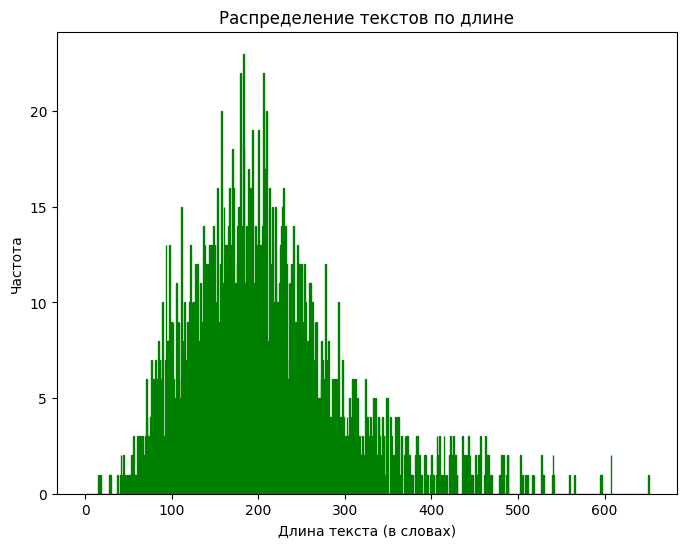

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(df['text_length'], bins=range(0, df['text_length'].max() + 1), edgecolor='green')
plt.xlabel('Длина текста (в словах)')
plt.ylabel('Частота')
plt.title('Распределение текстов по длине')
plt.show()

In [19]:
all_text = ''.join(df['text']).replace(" ", "")
char_count = len(all_text)  
char_freq = Counter(all_text)

print(char_freq)

Counter({'e': 442930, 's': 265368, 'i': 257020, 't': 253653, 'a': 253608, 'n': 246078, 'o': 226814, 'r': 217419, 'l': 186651, 'c': 156236, 'd': 125004, 'u': 110798, 'p': 97844, 'g': 93511, 'm': 89112, 'h': 70236, 'y': 56593, 'v': 53551, 'f': 51480, 'w': 37430, 'b': 35892, 'k': 29632, 'x': 10580, 'j': 4938, 'q': 3280, 'z': 2935, '0': 2317, '1': 1640, '2': 1234, '9': 836, '3': 694, '5': 653, '7': 604, '6': 537, '4': 476, '8': 472})


In [20]:
all_words_human = ' '.join(df[df['label'] == 0]['text'])
all_words_ai = ' '.join(df[df['label'] == 1]['text'])

words_human = all_words_human.split()
words_ai = all_words_ai.split()

In [21]:
word_human_freq = Counter(words_human)
word_ai_freq = Counter(words_ai)

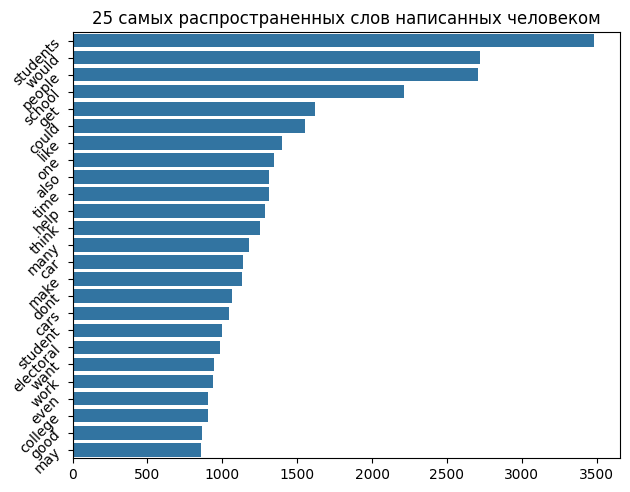

In [22]:
words = []
counter = []

for word, count in word_human_freq.most_common(25):
    words.append(word)
    counter.append(count)

sns.barplot(x=counter, y=words)
plt.yticks(rotation=45)
plt.tight_layout()
plt.title('25 самых распространенных слов написанных человеком')
plt.show()

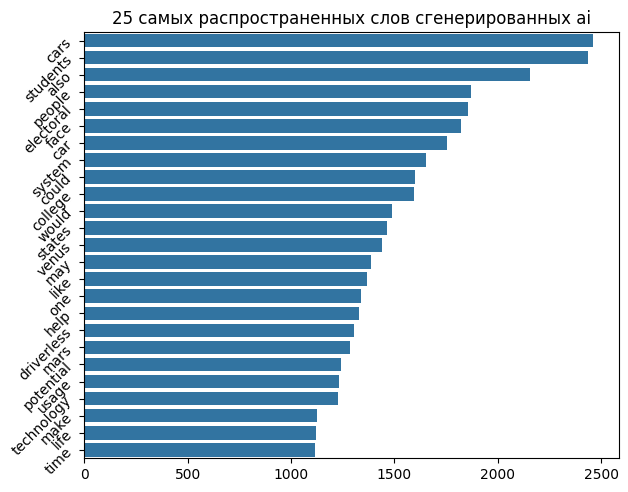

In [23]:
words = []
counter = []

for word, count in word_ai_freq.most_common(25):
    words.append(word)
    counter.append(count)

sns.barplot(x=counter, y=words)
plt.yticks(rotation=45)
plt.tight_layout()
plt.title('25 самых распространенных слов сгенерированных ai')
plt.show()

In [24]:
bigrams_human = nltk.ngrams(words_human, 2)
bigrams_ai = nltk.ngrams(words_ai, 2)

bigram_human_freq = Counter([' '.join(bigram) for bigram in bigrams_human])
bigram_ai_freq = Counter([' '.join(bigram) for bigram in bigrams_ai])

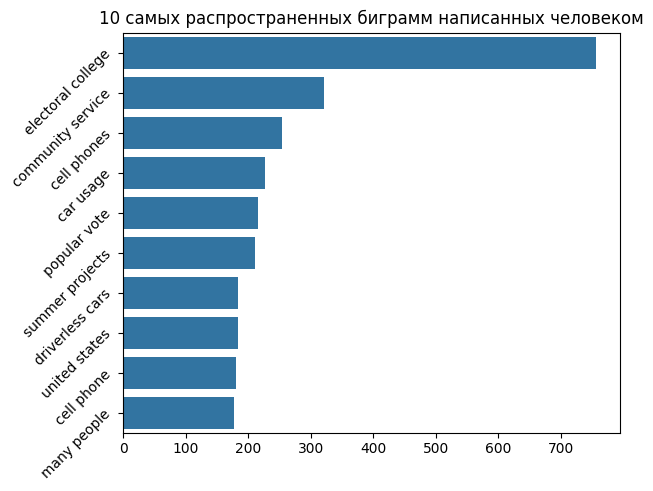

In [25]:
words = []
counter = []

for word, count in bigram_human_freq.most_common(10):
    words.append(word)
    counter.append(count)

sns.barplot(x=counter, y=words)
plt.yticks(rotation=45)
plt.tight_layout()
plt.title('10 самых распространенных биграмм написанных человеком')
plt.show()

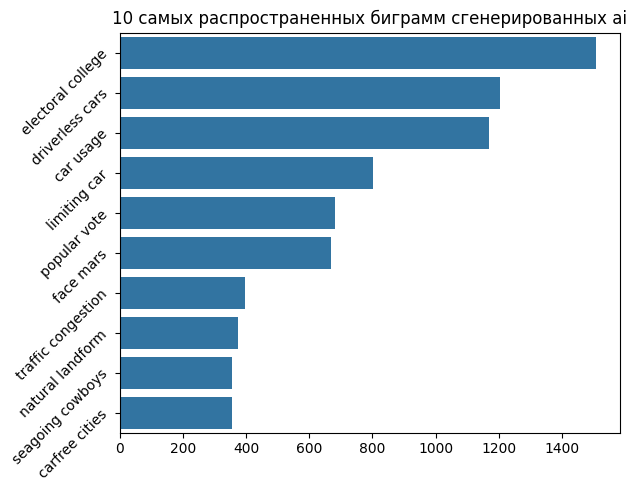

In [26]:
words = []
counter = []

for word, count in bigram_ai_freq.most_common(10):
    words.append(word)
    counter.append(count)

sns.barplot(x=counter, y=words)
plt.yticks(rotation=45)
plt.tight_layout()
plt.title('10 самых распространенных биграмм сгенерированных ai')
plt.show()

In [27]:
trigrams_human = nltk.ngrams(words_human, 3)
trigrams_ai = nltk.ngrams(words_ai, 3)

trigram_human_freq = Counter([' '.join(trigram) for trigram in trigrams_human])
trigram_ai_freq = Counter([' '.join(trigram) for trigram in trigrams_ai])

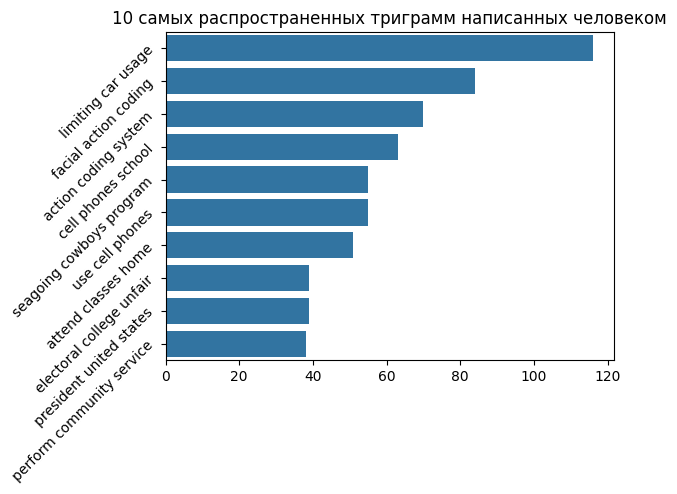

In [28]:
words = []
counter = []

for word, count in trigram_human_freq.most_common(10):
    words.append(word)
    counter.append(count)

sns.barplot(x=counter, y=words)
plt.yticks(rotation=45)
plt.tight_layout()
plt.title('10 самых распространенных триграмм написанных человеком')
plt.show()

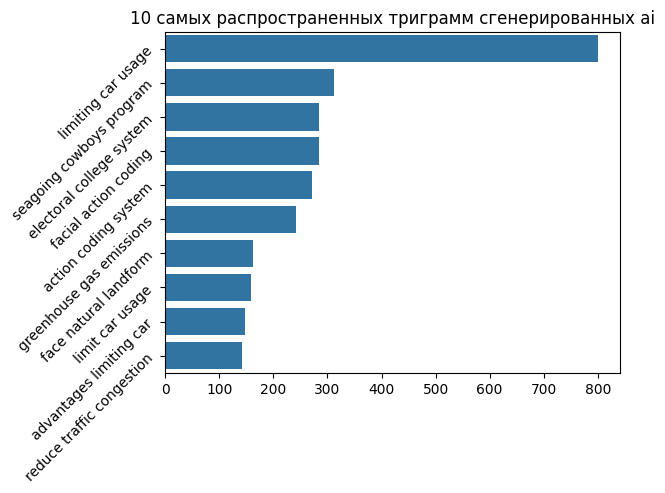

In [29]:
words = []
counter = []

for word, count in trigram_ai_freq.most_common(10):
    words.append(word)
    counter.append(count)

sns.barplot(x=counter, y=words)
plt.yticks(rotation=45)
plt.tight_layout()
plt.title('10 самых распространенных триграмм сгенерированных ai')
plt.show()

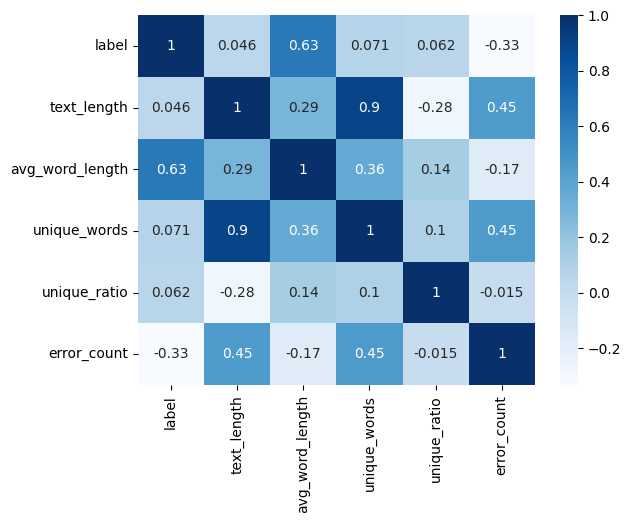

In [30]:
corr = df[['label', 'text_length', 'avg_word_length', 'unique_words', 'unique_ratio', 'error_count']].corr(method='spearman')
sns.heatmap(corr, cmap="Blues", annot=True);

In [31]:
words_token_human = nltk.word_tokenize(all_words_human)
words_token_ai = nltk.word_tokenize(all_words_ai)

In [32]:
pos_tags_human = nltk.pos_tag(words_token_human, lang='eng')

pos_counts_human = Counter(tag for word, tag in pos_tags_human)

print(pos_counts_human)

Counter({'NN': 62707, 'JJ': 33479, 'NNS': 30654, 'VBP': 14377, 'RB': 12968, 'VBG': 10698, 'VB': 10153, 'MD': 5924, 'VBD': 5683, 'IN': 3955, 'VBZ': 3908, 'CD': 3846, 'VBN': 3673, 'JJR': 1368, 'DT': 766, 'RBR': 761, 'JJS': 691, 'PRP': 685, 'RP': 181, 'CC': 166, 'FW': 86, 'WDT': 66, 'NNP': 48, 'TO': 41, 'RBS': 40, 'WRB': 28, 'UH': 23, 'WP': 20, 'WP$': 14, '$': 9, 'PRP$': 5, 'POS': 2, 'SYM': 2, 'EX': 2, 'NNPS': 2, "''": 1})


In [33]:
pos_tags_ai = nltk.pos_tag(words_token_ai, lang='eng')

pos_counts_ai = Counter(tag for word, tag in pos_tags_ai)

print(pos_counts_ai)

Counter({'NN': 94333, 'JJ': 59943, 'NNS': 52047, 'VBG': 19587, 'VBP': 18432, 'RB': 17273, 'VB': 10083, 'VBD': 7631, 'VBZ': 7017, 'VBN': 5722, 'MD': 5356, 'IN': 5229, 'CD': 3816, 'JJR': 1984, 'RBR': 997, 'DT': 823, 'PRP': 740, 'JJS': 603, 'CC': 143, 'FW': 116, 'RP': 90, 'TO': 69, 'NNP': 42, 'WRB': 35, 'RBS': 31, 'WDT': 27, 'WP': 14, 'UH': 7, 'WP$': 6, '$': 5, 'PRP$': 4, 'EX': 3, 'POS': 2, "''": 1})


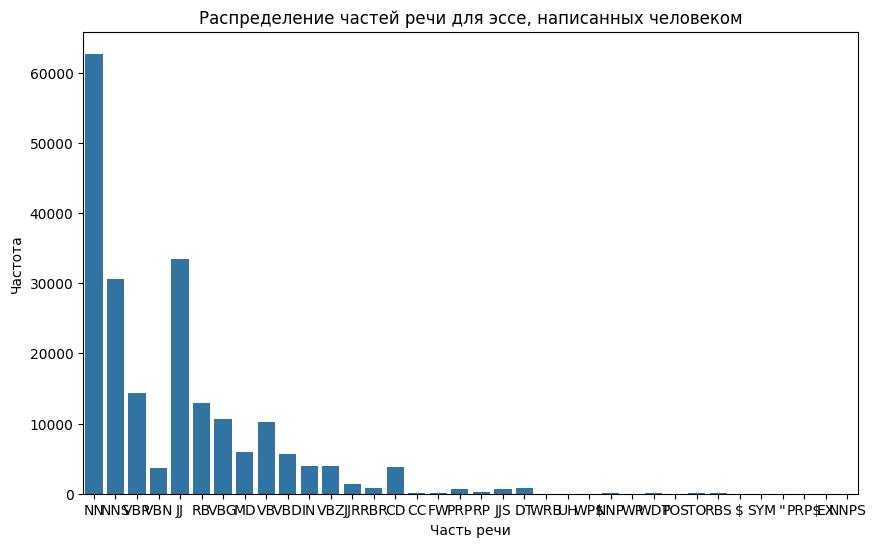

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pos_counts_human.keys(), y=pos_counts_human.values())
plt.title("Распределение частей речи для эссе, написанных человеком")
plt.xlabel("Часть речи")
plt.ylabel("Частота")
plt.show()

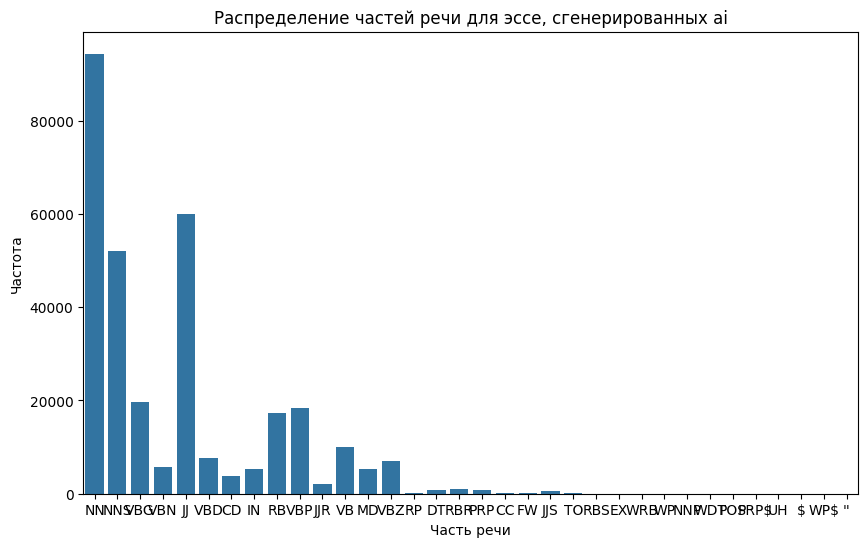

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pos_counts_ai.keys(), y=pos_counts_ai.values())
plt.title("Распределение частей речи для эссе, сгенерированных ai")
plt.xlabel("Часть речи")
plt.ylabel("Частота")
plt.show()

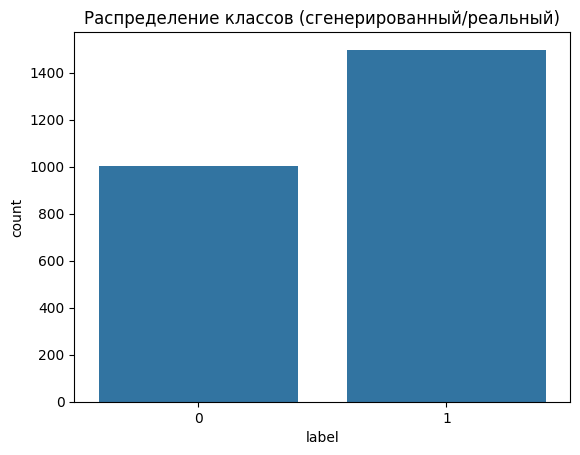

In [36]:
sns.countplot(data=df, x='label')
plt.title("Распределение классов (сгенерированный/реальный)")
plt.show()

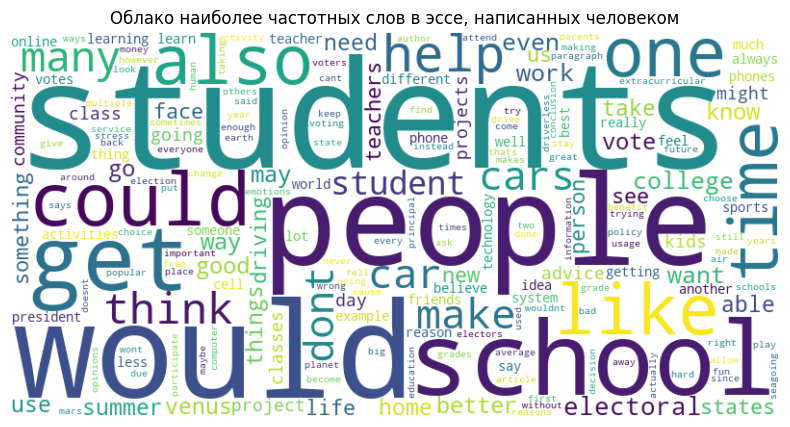

In [37]:
wordcloud_human = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_human_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_human, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных слов в эссе, написанных человеком")
plt.show()

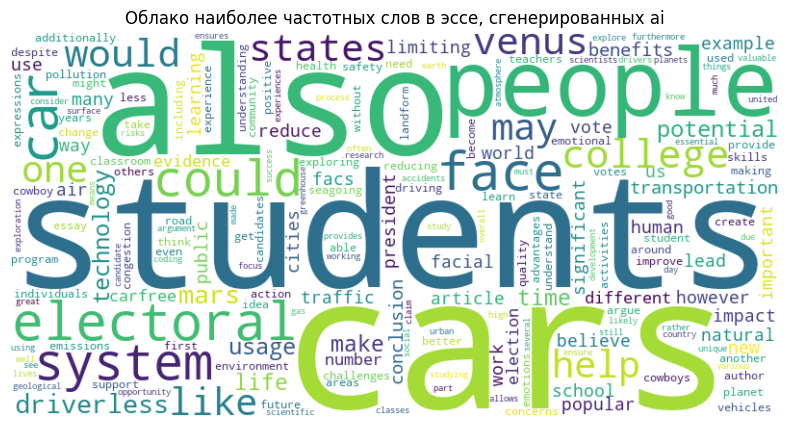

In [38]:
wordcloud_ai = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_ai_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ai, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных слов в эссе, сгенерированных ai")
plt.show()

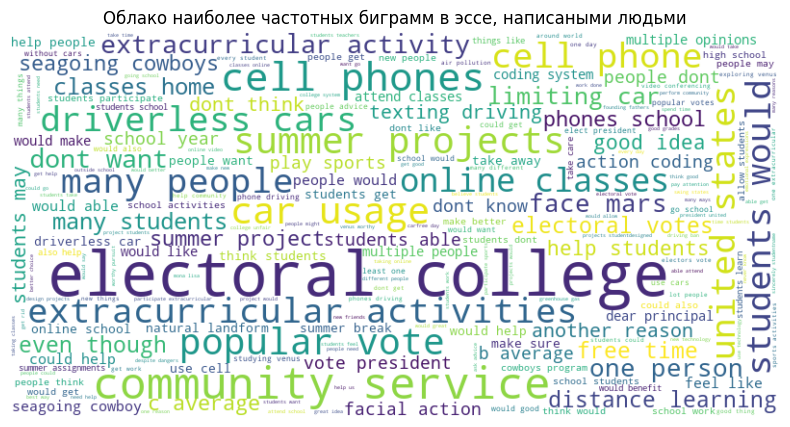

In [39]:
bigram_wordcloud_human = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_human_freq)
plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud_human, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных биграмм в эссе, написаными людьми")
plt.show()

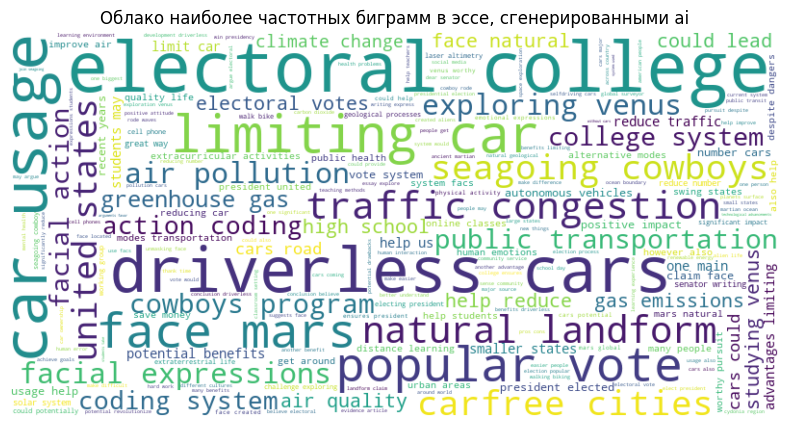

In [40]:
bigram_wordcloud_ai = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_ai_freq)
plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud_ai, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных биграмм в эссе, сгенерированными ai")
plt.show()

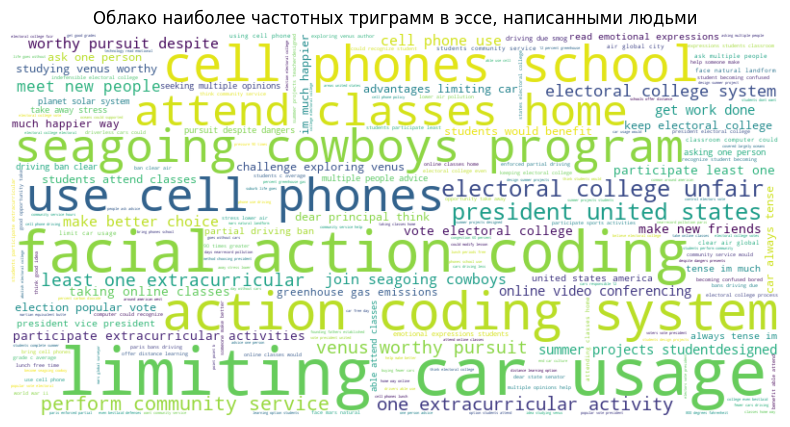

In [41]:
trigram_wordcloud_human = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_human_freq)
plt.figure(figsize=(10, 5))
plt.imshow(trigram_wordcloud_human, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных триграмм в эссе, написанными людьми")
plt.show()

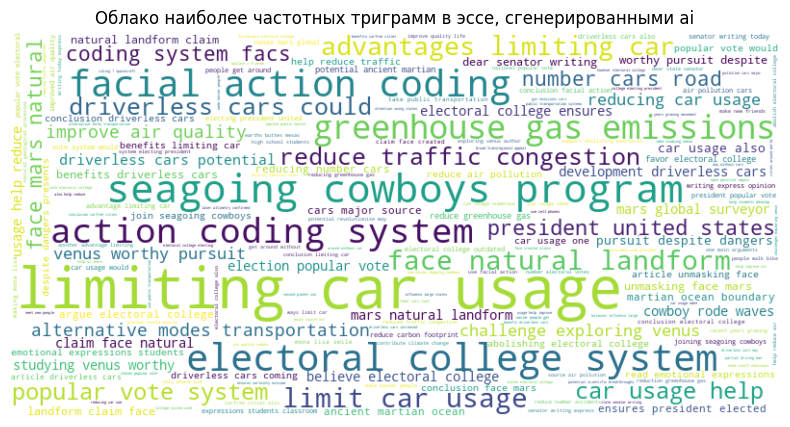

In [42]:
trigram_wordcloud_ai = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_ai_freq)
plt.figure(figsize=(10, 5))
plt.imshow(trigram_wordcloud_ai, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных триграмм в эссе, сгенерированными ai")
plt.show()

In [43]:
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['text']).toarray()

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

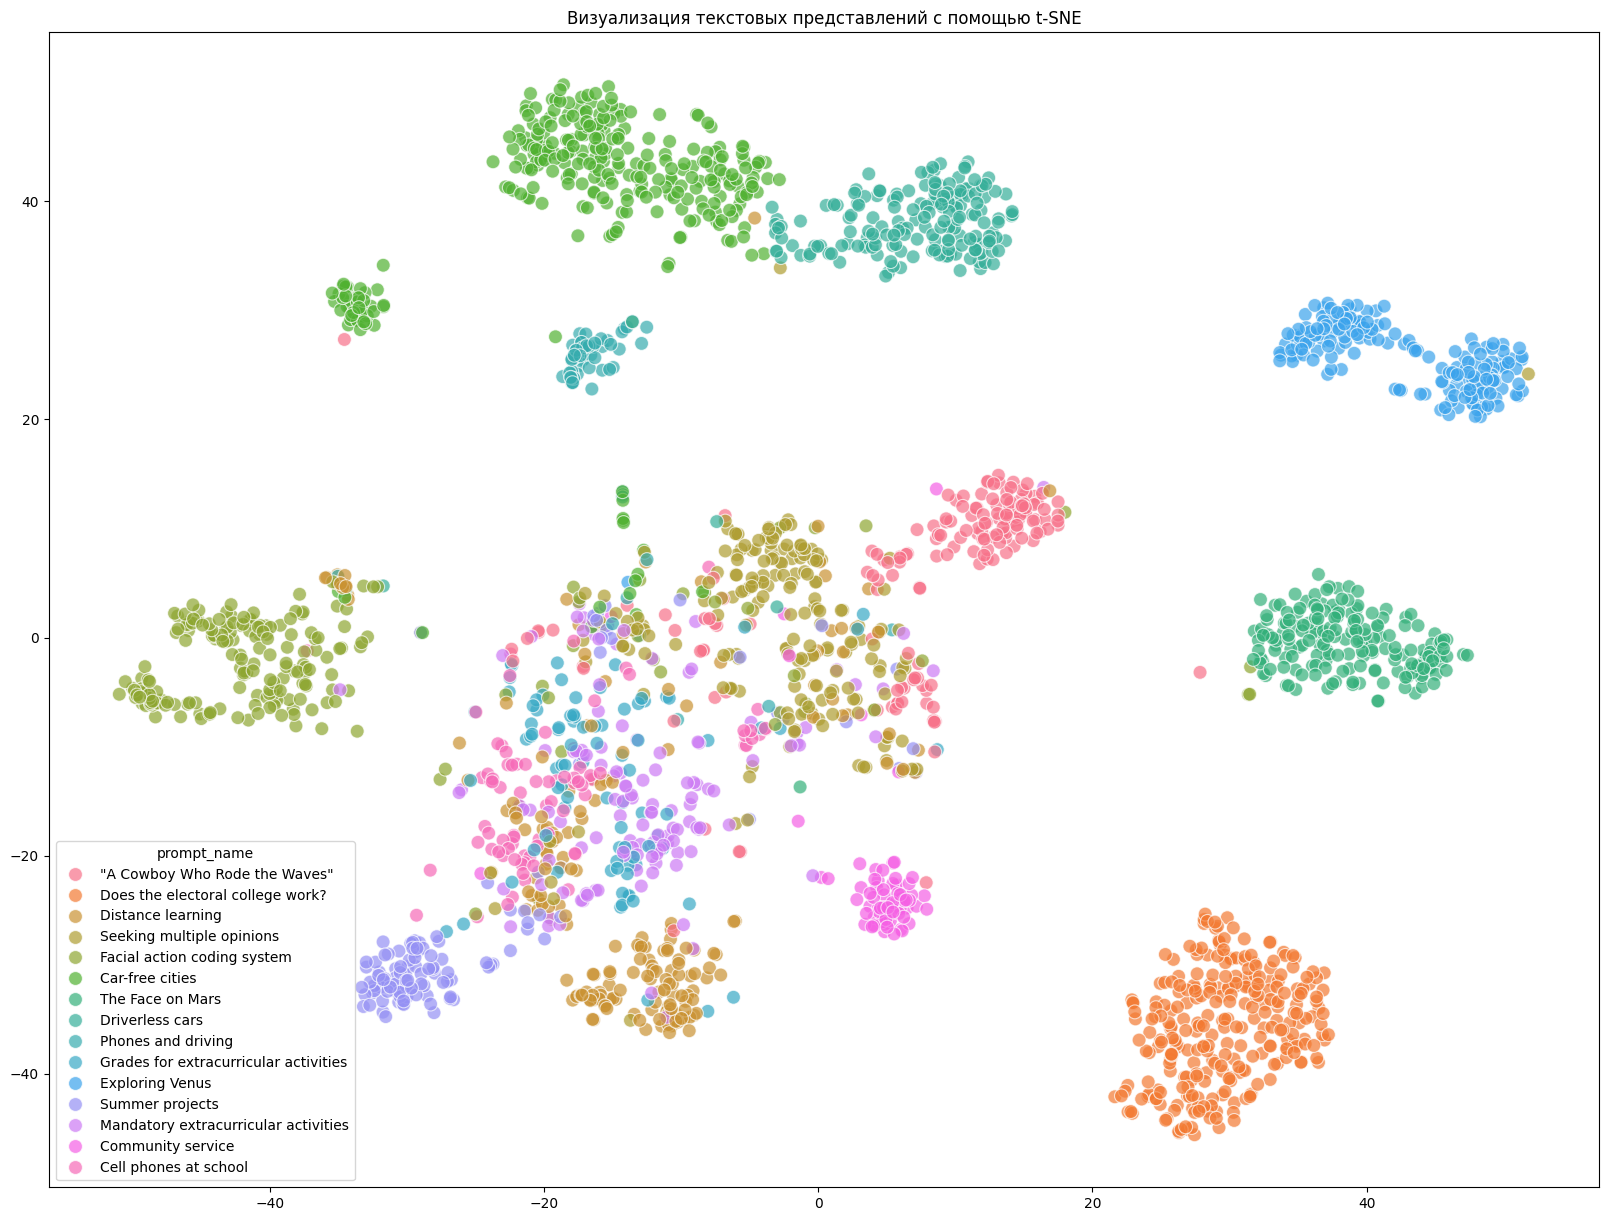

In [44]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['prompt_name'], s=100, alpha=0.7)
plt.title("Визуализация текстовых представлений с помощью t-SNE")
plt.show()

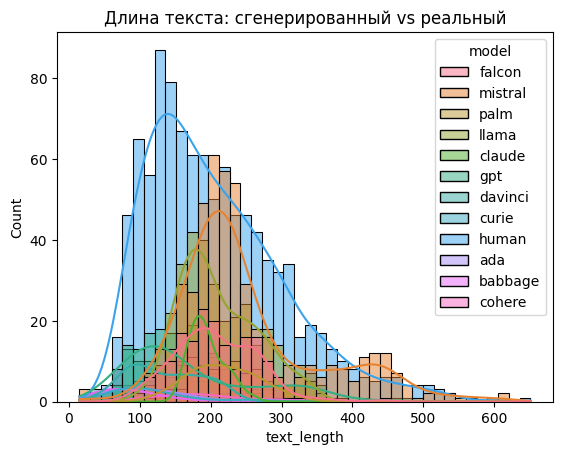

In [57]:
sns.histplot(data=df, x='text_length', hue='model', kde=True)
plt.title("Длина текста: сгенерированный vs реальный")
plt.show()

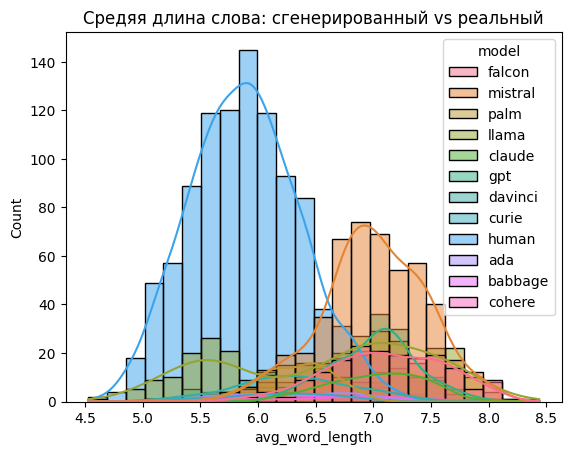

In [58]:
sns.histplot(data=df, x='avg_word_length', hue='model', kde=True)
plt.title("Средяя длина слова: сгенерированный vs реальный")
plt.show()

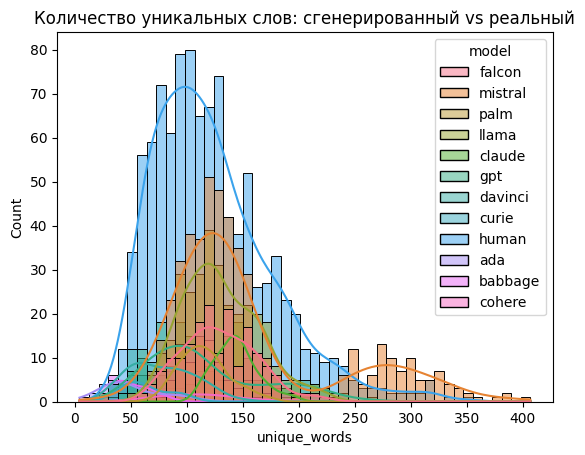

In [59]:
sns.histplot(data=df, x='unique_words', hue='model', kde=True)
plt.title("Количество уникальных слов: сгенерированный vs реальный")
plt.show()

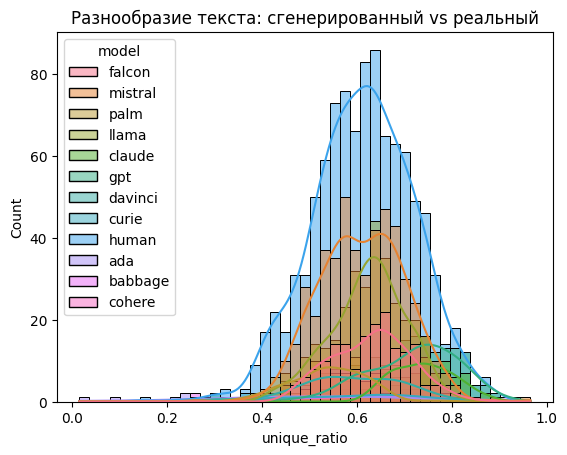

In [60]:
sns.histplot(data=df, x='unique_ratio', hue='model', kde=True)
plt.title("Разнообразие текста: сгенерированный vs реальный")
plt.show()

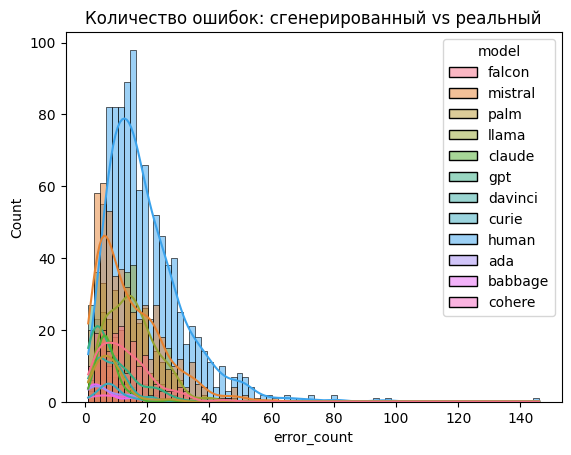

In [61]:
sns.histplot(data=df, x='error_count', hue='model', kde=True)
plt.title("Количество ошибок: сгенерированный vs реальный")
plt.show()

In [50]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer("english")
stems_human = [snowball.stem(word) for word in words_token_human]
stems_human_freq = Counter(stems_human)

In [51]:
stems_ai = [snowball.stem(word) for word in words_token_ai]
stems_ai_freq = Counter(stems_ai)

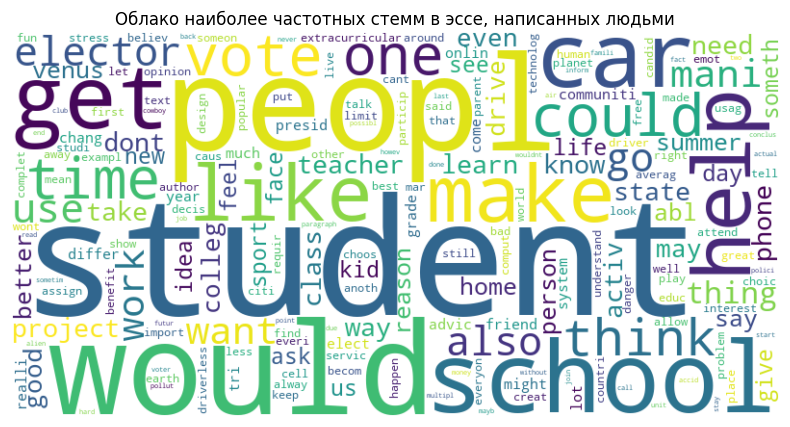

In [52]:
stems_wordcloud_human = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(stems_human_freq)
plt.figure(figsize=(10, 5))
plt.imshow(stems_wordcloud_human, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных стемм в эссе, написанных людьми")
plt.show()

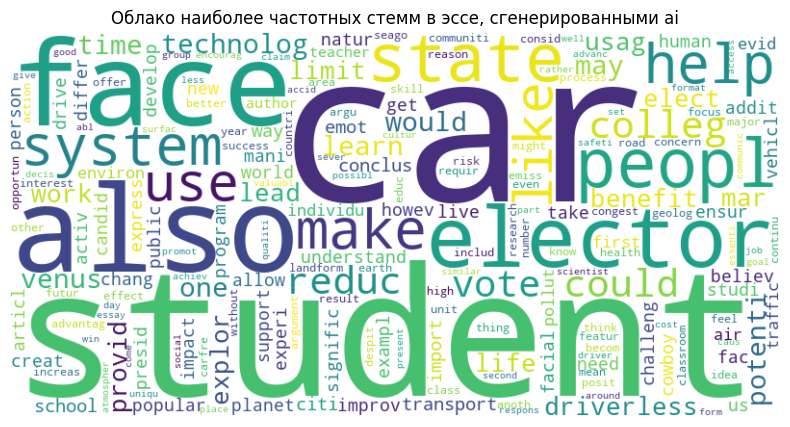

In [53]:
stems_wordcloud_ai = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(stems_ai_freq)
plt.figure(figsize=(10, 5))
plt.imshow(stems_wordcloud_ai, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных стемм в эссе, сгенерированными ai")
plt.show()

In [54]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()


lemmas_human = [lemmatizer.lemmatize(word) for word in words_token_human]
lemmas_ai = [lemmatizer.lemmatize(word) for word in words_token_ai]

__Итоги анализа текстов__
Самыми частыми словами в текстах, написанных людьми были __students, would, people__ и т.д.
Самыми частыми словами в текстах, сгенерированных ai были __cars, students, also__ и т.д.

Самыми частыми биграммами в текстах, написанных людьми были __electoral college, community service, cell phones__
Самыми частыми биграммами в текстах, сгенерированных ai были __electoral college, driverless cars, car usage__, что является частями текстов промпта

Наибольшую корреляцию с таргетным признаком проявляет средняя длина слов, скорее всего это из-за того, что модель старается говорить более проффесиональным языком и использовать сложные слова.

Наиболее отличающаяся от человеческих текстов является модель mistral.